In [58]:
using Gadfly
using JuMP
using Ipopt

<br>

Endowements:

In [2]:
# Agent A
ω1_A = 6
ω2_A = 8

# Agent B
ω1_B = 4
ω2_B = 12;

Initial utilities:
$$ U_A = x_A^1 x_A^2 \quad \quad U_B = x_B^1 x_B^2$$

In [3]:
# Agent A
U_A(x1, x2) = x1*x2
U_A(ω1_A,ω2_A)

48

In [4]:
# Agent B
U_B(x1, x2) = x1*x2
U_B(ω1_B,ω2_B)

48

Edgeworth Box:

In [17]:
function CC_maker(utility)    
    CC = Model(solver=IpoptSolver())
    
    @variable(CC, x1_A >= 0 )
    @variable(CC, x2_A >= 0)
    @variable(CC, x1_B >= 0 )
    @variable(CC, x2_B >= 0)
    
    @constraint(CC, x1_B*x2_B >= utility)
    @constraint(CC, x1_A+x1_B == ω1_A+ω1_B)
    @constraint(CC, x2_A+x2_B == ω2_A+ω2_B)
    
    @objective(CC, Max, U_A(x1_A,x2_A))
    
    solve(CC)
    
    push!(domain_CC, getvalue(x1_A))   
    push!(range_CC, getvalue(x2_A))
    
end

CC_maker (generic function with 1 method)

In [18]:
domain_CC = []
range_CC = [];

In [ ]:
for utility_level in 1:10:200
    CC_maker(utility_level)
end

In [69]:
domain = linspace(0, ω1_A+ω1_B, 1000);

In [70]:
plot_U_A(x,x1,x2) = U_A(x1, x2)/x
plot_U_B(x,x1,x2) = U_B(x1, x2)/(x-ω1_A-ω1_B)+ω2_A+ω2_B

plot_U_B (generic function with 1 method)

In [72]:
set_default_plot_size(20cm, 20cm)

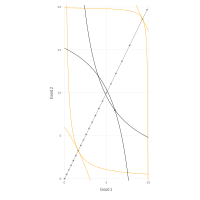

In [98]:
plot(
    layer(x=[ω1_A], y=[ω2_A], Geom.point, Theme(default_color=colorant"black")),
    # initial curves
    layer(x=domain, y=plot_U_A(domain,ω1_A,ω2_A), Geom.line, Theme(default_color=colorant"black")),
    layer(x=domain, y=plot_U_B(domain,ω1_B,ω2_B), Geom.line, Theme(default_color=colorant"black")),
    # upper curves
    layer(x=domain, y=plot_U_A(domain,domain_CC[1],range_CC[1]), Geom.line, Theme(default_color=colorant"orange")),
    layer(x=domain, y=plot_U_B(domain,ω1_A+ω1_B-domain_CC[1],ω2_A+ω2_B-range_CC[1]), Geom.line, Theme(default_color=colorant"orange")),
    # lower curves
    layer(x=domain, y=plot_U_A(domain,domain_CC[15],range_CC[15]), Geom.line, Theme(default_color=colorant"orange")),
    layer(x=domain, y=plot_U_B(domain,ω1_A+ω1_B-domain_CC[15],ω2_A+ω2_B-range_CC[15]), Geom.line, Theme(default_color=colorant"orange")), 
    # contract curve
    layer(x=domain_CC, y=range_CC, Geom.point, Geom.line, Theme(default_color=colorant"grey")),
    Coord.Cartesian(xmin=0,xmax=ω1_A+ω1_B,ymin=0,ymax=ω2_A+ω2_B,fixed=true),
    Guide.xlabel("Good 1"),
    Guide.ylabel("Good 2"),
)

<br>